In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# AUC 계산 연습

In [0]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 0, 0])
# pred = np.array([0.1, 0.4, 0.35, 0.8, 0.1])
pred = np.array([0.9, 0.6, 0.1, 0.4])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
metrics.auc(fpr, tpr)

1.0

In [0]:
print(fpr)
print(tpr)

[0. 0. 0. 1.]
[0.  0.5 1.  1. ]


In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

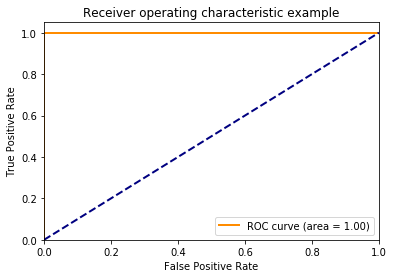

In [0]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2    # lw: line width, plot의 선 굵기
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [0]:
import pandas as pd
path_base = '/content/drive/My Drive/금융문자/일지 및 이슈/평가지표(AUC)관련/'
file_name = 'AUC_calctest_sub_BERT(NaverMovieOrigin)_30000samples_epoch3_auc928.csv'
df_sub = pd.read_csv(path_base + file_name)
df_sub = df_sub.loc[:len(df_sub)-2, :]    # 맨 마지막열(합계) 제거
df_sub.rename(columns={'Unnamed: 2':'pseudo_label'}, inplace=True)
df_sub.tail()

,id,smishing,pseudo_label
1621,341621.0,0.000032,0
1622,341622.0,0.000032,0
1623,341623.0,0.000032,0
1624,341624.0,0.000033,0
1625,341625.0,0.995709,1


In [0]:
import numpy as np
from sklearn import metrics
y = df_sub['pseudo_label'].values
# pred = np.array([0.1, 0.4, 0.35, 0.8, 0.1])
pred = df_sub['smishing'].values
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
metrics.auc(fpr, tpr)

1.0

In [0]:
print(len(thresholds))
print(thresholds[:10])
print(thresholds[-10:])

269
[1.99984195 0.99984195 0.99984122 0.99984107 0.99984099 0.99984075
 0.99983899 0.99983715 0.99983133 0.99983099]
[3.16e-05 3.15e-05 3.14e-05 3.13e-05 3.12e-05 3.11e-05 3.10e-05 3.09e-05
 3.08e-05 3.06e-05]


In [0]:
thresholds[-1] == df_sub['smishing'].sort_values(ascending=False)[1490]


True

In [0]:
df_sub['smishing'].sort_values(ascending=False).drop_duplicates()#values[:10]

345     0.999842
398     0.999841
1566    0.999841
372     0.999841
953     0.999841
          ...   
703     0.000031
1114    0.000031
213     0.000031
1131    0.000031
1490    0.000031
Name: smishing, Length: 747, dtype: float64

In [0]:
print(df_sub['smishing'].sort_values(ascending=False)[1131])
print(df_sub['smishing'].sort_values(ascending=False)[1490])


3.0799999999999996e-05
3.06e-05


In [0]:
df_sub['smishing'].sort_values(ascending=False)[1490] == df_sub['smishing'].sort_values(ascending=False)[1131]

False

In [0]:
print(fpr)
print(tpr)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00395517 0.00527357 0.00988794 0.01120633 0.01384311 0.01450231
 0.0158207  0.01713909 0.01845748 0.03625577 0.03757416 0.04218853
 0.04350692 0.04878049 0.05009888 0.05998682 0.0626236  0.07646671
 0.0777851  0.08108108 0.08305867 0.09558339 0.09690178 0.11272248
 0.11404087 0.12920237 0.13052076 0.13777192 0.13909031 0.15227423
 0.15425181 0.1568886  0.16150297 0.18391562 0.18523401 0.20830587
 0.20962426 0.21094265 0.21226104 0.2195122  0.22083059 0.22544496
 0.22940013 0.23071852 0.23269611 0.24851681 0.2498352  0.25247198
 0.25379038 0.25576796 0.25774555 0.26038233 0.27224786 0.27356625
 0.27488464 0.27620303 0.2814766  0.28279499 0.28543177 0.28675016
 0.29202373 0.29334212 0.29400132 0.2966381  0.29795649 0.29861569
 0.29993408 0.30125247 0.30

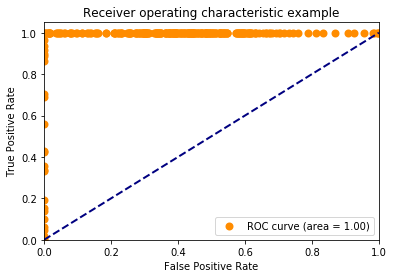

In [0]:
import matplotlib.pyplot as plt

def f_plot_roc(var_fpr, var_tpr, var_auc):
    plt.figure()
    lw = 2    # lw: line width, plot의 선 굵기
    plt.scatter(var_fpr, var_tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % var_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
f_plot_roc(fpr, tpr, metrics.auc(fpr, tpr))

f_threshold: 0.9
0    1517
1     109
Name: pseudo_label, dtype: int64


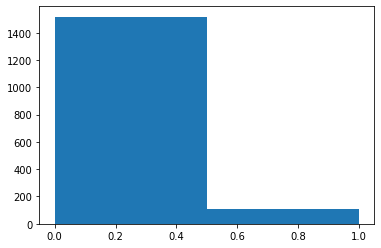

In [0]:
f_threshold = 0.9
df_sub['pseudo_label'] = df_sub.apply(lambda row: 1 if row['smishing'] > f_threshold else 0, axis=1)
print('f_threshold:', f_threshold)
plt.hist(df_sub['pseudo_label'], bins=2)
print(df_sub['pseudo_label'].value_counts())

f_threshold: 0.9
0    1517
1     109
Name: pseudo_label, dtype: int64


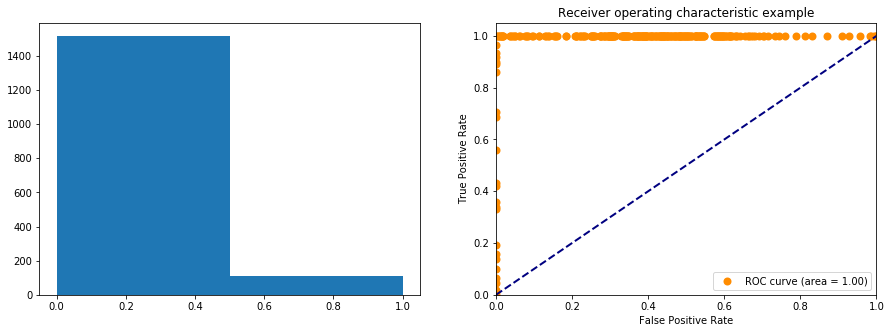

In [0]:
import matplotlib.pyplot as plt

def f_plot_roc(var_df_data, var_f_threshold=None):
    fig, ax = plt.subplots(1,2, figsize=(15,5))

    if var_f_threshold!=None:
        var_df_data['pseudo_label'] = var_df_data.apply(lambda row: 1 if row['smishing'] > var_f_threshold else 0, axis=1)
        print('f_threshold:', var_f_threshold)
        ax[0].hist(var_df_data['pseudo_label'], bins=2)
        print(var_df_data['pseudo_label'].value_counts())
        
    y = var_df_data['pseudo_label'].values
    pred = var_df_data['smishing'].values
    fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
    # var_f_threshold = 0.9
    
    # plt.figure()
    lw = 2    # lw: line width, plot의 선 굵기
    ax[1].scatter(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
    ax[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver operating characteristic example')
    ax[1].legend(loc="lower right")
    plt.show()
f_plot_roc(df_sub, var_f_threshold=0.9)

# pseudo label 기준값에 따른 AUC (AUC는 모두 1로서 차이가 없음)

threshold: 0.01
f_threshold: 0.01
0    1457
1     169
Name: pseudo_label, dtype: int64


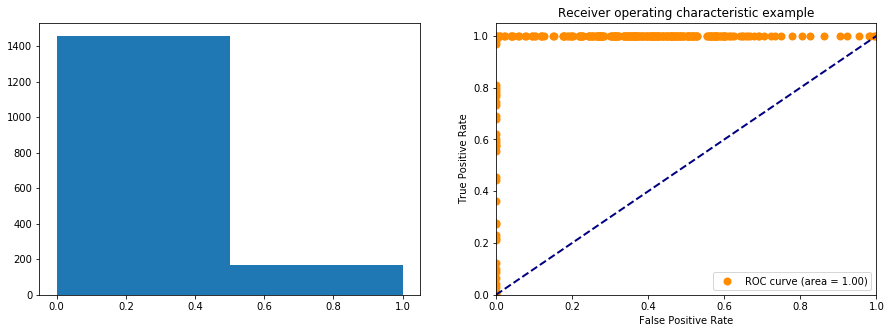

threshold: 0.1
f_threshold: 0.1
0    1492
1     134
Name: pseudo_label, dtype: int64


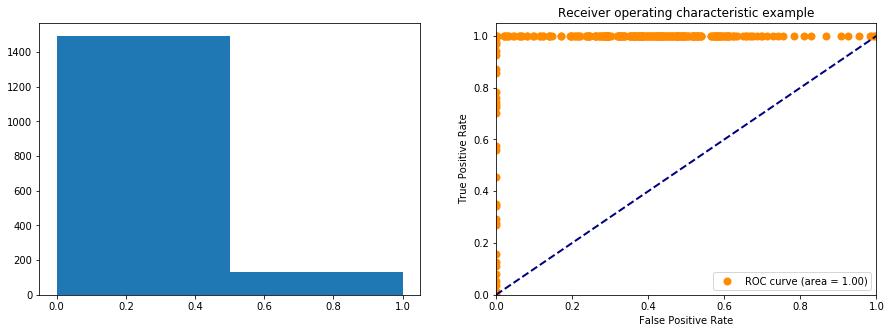

threshold: 0.2
f_threshold: 0.2
0    1505
1     121
Name: pseudo_label, dtype: int64


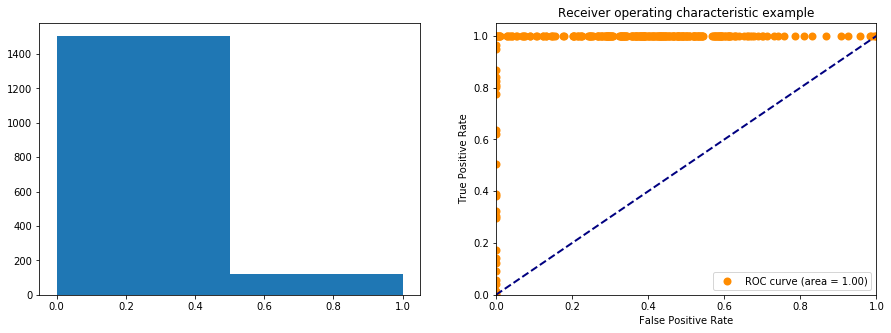

threshold: 0.3
f_threshold: 0.3
0    1511
1     115
Name: pseudo_label, dtype: int64


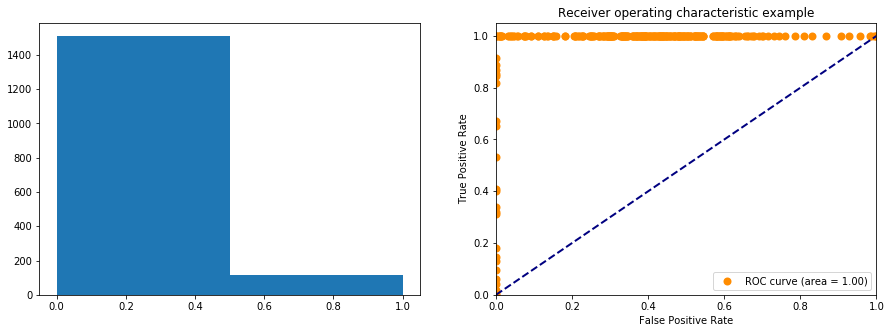

threshold: 0.4
f_threshold: 0.4
0    1513
1     113
Name: pseudo_label, dtype: int64


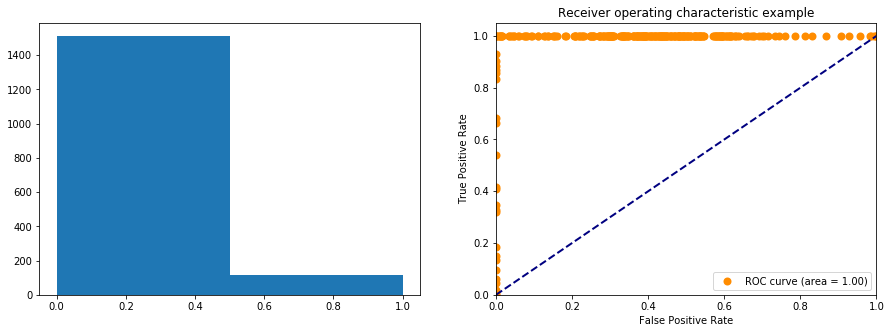

threshold: 0.5
f_threshold: 0.5
0    1514
1     112
Name: pseudo_label, dtype: int64


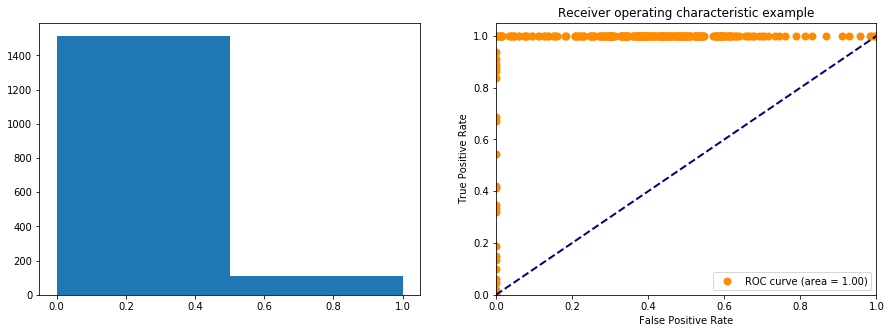

threshold: 0.6
f_threshold: 0.6
0    1515
1     111
Name: pseudo_label, dtype: int64


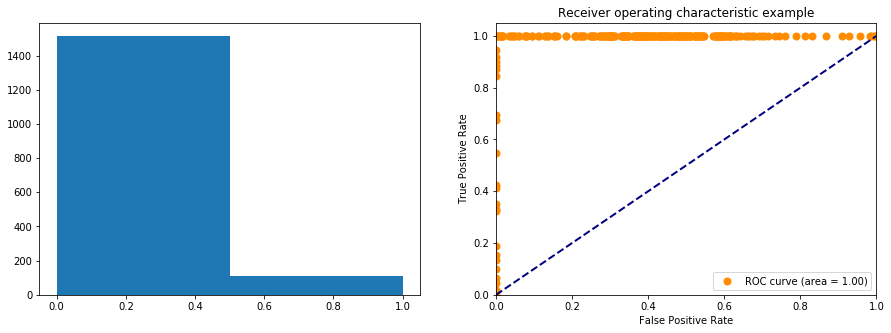

threshold: 0.7
f_threshold: 0.7
0    1515
1     111
Name: pseudo_label, dtype: int64


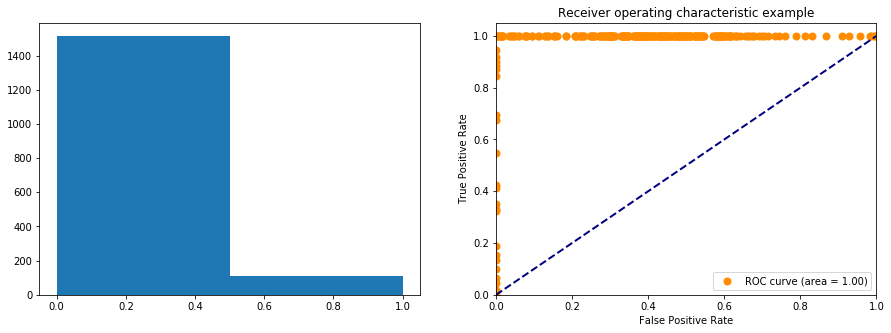

threshold: 0.8
f_threshold: 0.8
0    1516
1     110
Name: pseudo_label, dtype: int64


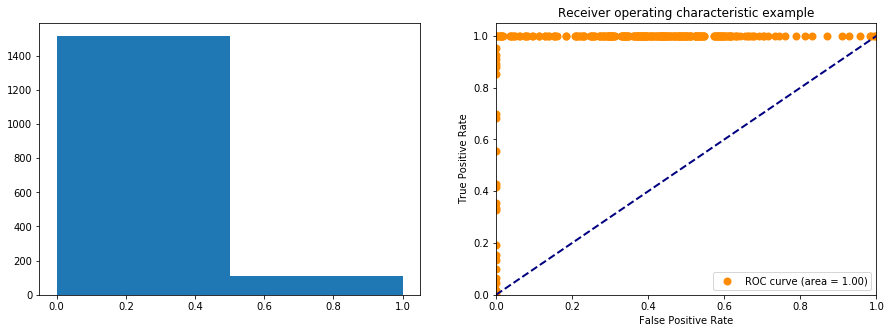

threshold: 0.9
f_threshold: 0.9
0    1517
1     109
Name: pseudo_label, dtype: int64


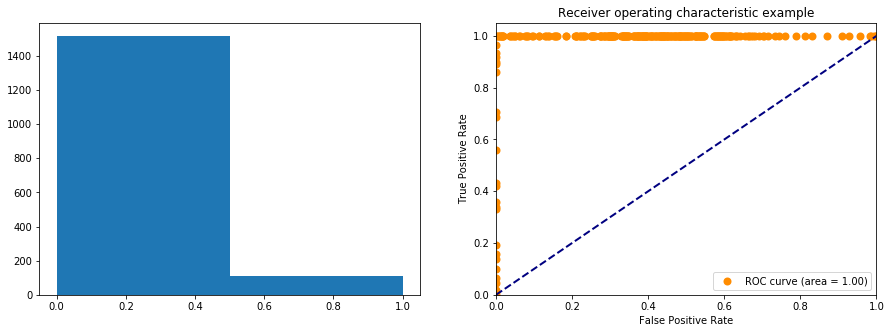

threshold: 0.99
f_threshold: 0.99
0    1536
1      90
Name: pseudo_label, dtype: int64


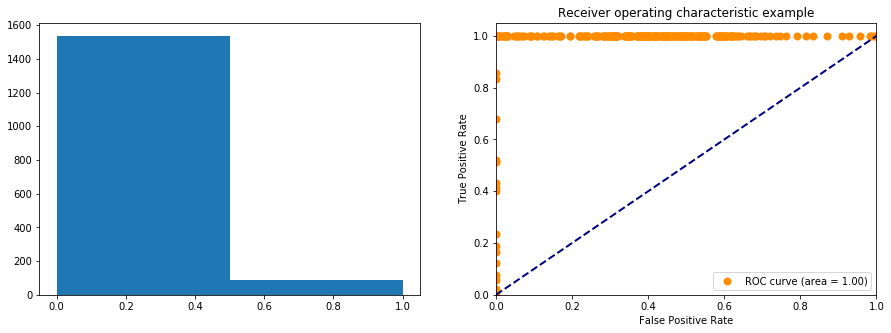

In [0]:
for f_threshold in [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]:
    print('threshold:', f_threshold)
    f_plot_roc(var_f_threshold=f_threshold)


threshold: 0.01
f_threshold: 0.01
0    1457
1     169
Name: pseudo_label, dtype: int64


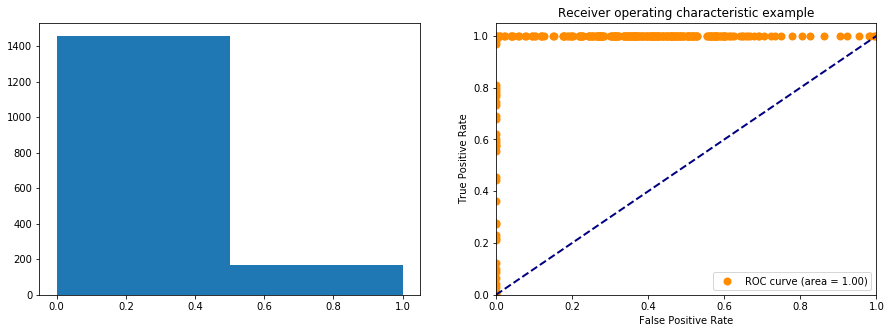

threshold: 0.001
f_threshold: 0.001
0    1380
1     246
Name: pseudo_label, dtype: int64


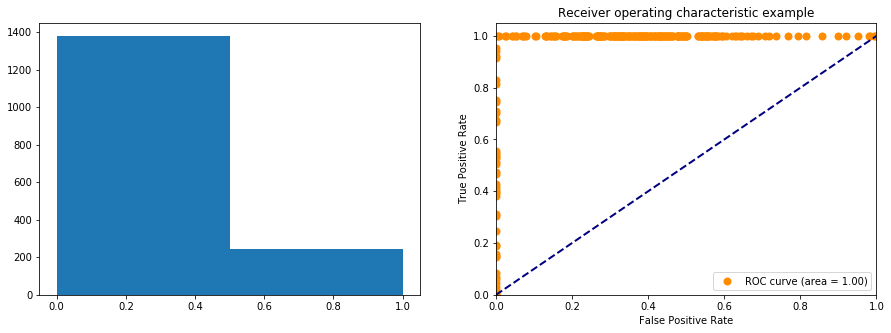

threshold: 0.0001
f_threshold: 0.0001
0    1094
1     532
Name: pseudo_label, dtype: int64


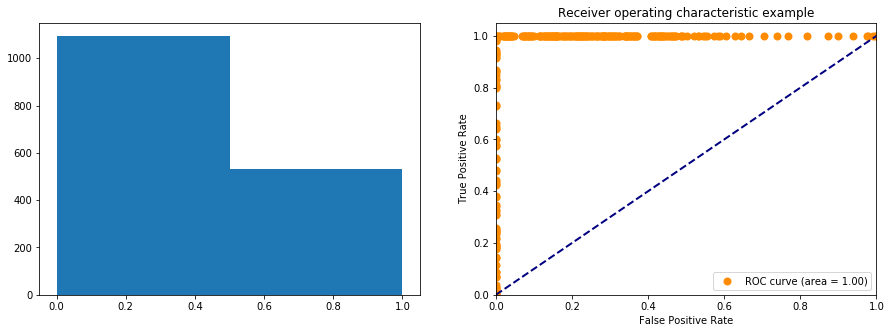

threshold: 0.0001
f_threshold: 0.0001
0    1094
1     532
Name: pseudo_label, dtype: int64


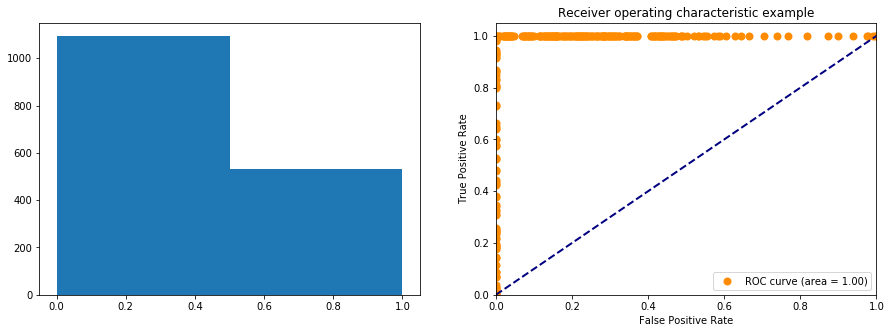

threshold: 1e-05
f_threshold: 1e-05
1    1626
Name: pseudo_label, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:113: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


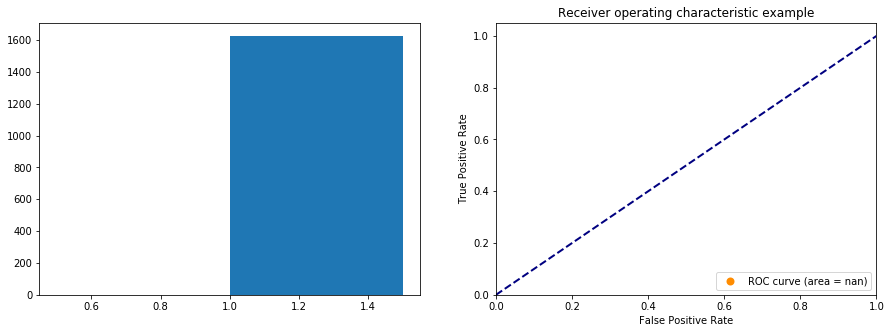

threshold: 1e-06
f_threshold: 1e-06
1    1626
Name: pseudo_label, dtype: int64


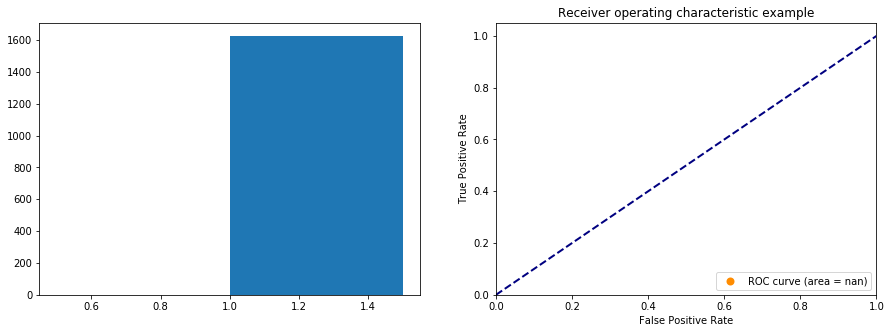

In [0]:
for f_threshold in [0.01, 0.001, 0.0001, 0.0001, 0.00001, 0.000001]:
    print('threshold:', f_threshold)
    f_plot_roc(var_f_threshold=f_threshold)

In [0]:
np.random.seed(2019)    # 재현을 위해서 seed를 설정함
int_nb_rand_idx = int(len(df_sub['pseudo_label'] == 0)*0.1)
print(int_nb_rand_idx)
np.random.choice(df_sub[df_sub['pseudo_label'] == 0]['pseudo_label'].index.values, int_nb_rand_idx)


162


array([1161,  383, 1253,  192,   24,  837, 1371,  410,  107, 1105, 1273,
       1296, 1081,  618,   12, 1037,  722,  134,  388,  832, 1384,  829,
        446, 1598,  599,  863, 1070,  678,  363, 1039,  479,   86, 1593,
        723,  734,  431,  452, 1169,  632,  488, 1414, 1440,  456,  137,
        116,  882,  136, 1305, 1359, 1475,  289,  982, 1471,  890, 1299,
       1306,  670,   99, 1180, 1447, 1448, 1463,  627,  690, 1077,  283,
        951, 1385, 1371, 1167,  277,  447, 1401,  546,   45, 1111,  890,
       1147,  597,  272, 1220, 1016, 1079, 1198,  907, 1101,  561,  344,
        640,  914, 1416,  724,  240, 1147,  622, 1387,  339,  260,  356,
         29,  104, 1216,    8,  513,  594, 1223, 1600, 1513,  277,  808,
       1459, 1092,   30, 1414,  964, 1305,  675,  347,  196,   13,  918,
        425,  466,  633,  945,  467,  997,  307,  437, 1008, 1569, 1220,
        816,  852,    3,  343, 1269,  150, 1619, 1383,  250, 1274, 1354,
        724,  870,  443, 1214,  274, 1065,  502, 11

In [0]:
np.random.choice([1,2,3,4,5], 2)

array([4, 5])

In [0]:
f_plot_roc(df_sub, var_f_threshold=0.9)

# s_191226_01 예측값분포

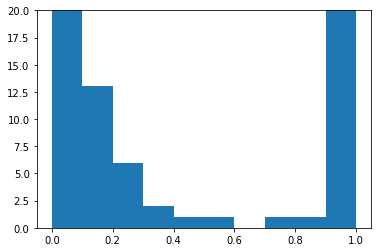

In [0]:
# 모델은 중간이 없고, 0에 매우 근접한 수 또는 1에 매우 근접한 수를 출력한다.
plt.hist(df_sub['smishing'], bins=10)
plt.ylim(0,20)
plt.show()

            id  smishing  pseudo_label
120   340120.0  0.100553             0
268   340268.0  0.113772             0
270   340270.0  0.113772             0
271   340271.0  0.113772             0
286   340286.0  0.108520             0
309   340309.0  0.113772             0
557   340557.0  0.197229             0
573   340573.0  0.104167             0
588   340588.0  0.469239             0
629   340629.0  0.104167             0
855   340855.0  0.746716             0
1075  341075.0  0.390050             0
1151  341151.0  0.265512             0
1250  341250.0  0.220020             0
1251  341251.0  0.185874             0
1253  341253.0  0.275410             0
1278  341278.0  0.135755             0
1289  341289.0  0.183015             0
1314  341314.0  0.538692             0
1315  341315.0  0.278149             0
1316  341316.0  0.226413             0
1378  341378.0  0.804454             0
1440  341440.0  0.310515             0
1507  341507.0  0.135755             0
1578  341578.0  0.278149 

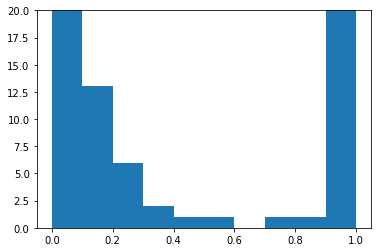

In [0]:
# 0.1~0.9 사이의 값이 어느정도 존재한다.
print(df_sub[(df_sub['smishing'] > 0.1) & (df_sub['smishing'] < 0.9)])
plt.hist(df_sub['smishing'], bins=10)
plt.ylim(0,20)
plt.show()

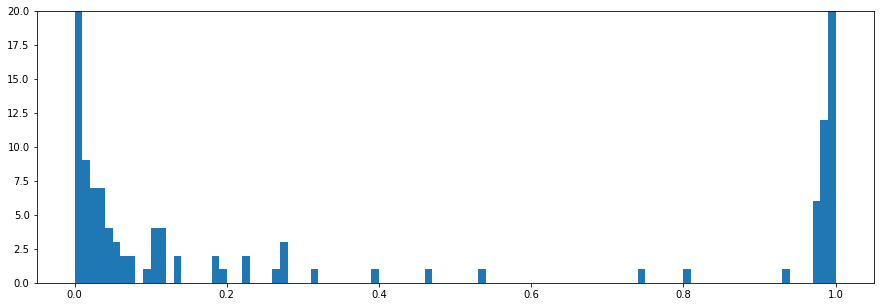

In [0]:
plt.figure(figsize=(15,5))
plt.hist(df_sub['smishing'], bins=100)
plt.ylim(0,20)
plt.show()

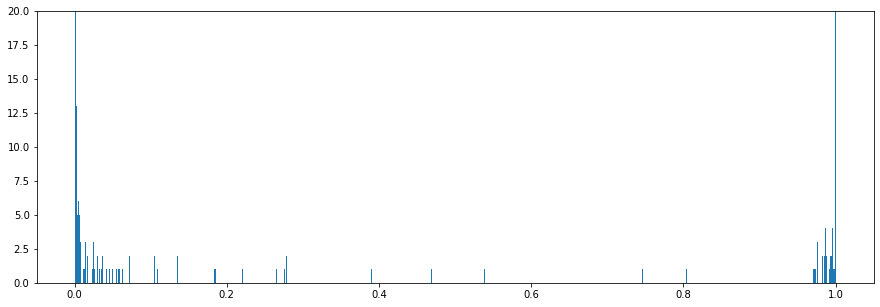

In [0]:
plt.figure(figsize=(15,5))
plt.hist(df_sub['smishing'], bins=1000)
plt.ylim(0,20)
plt.show()

In [0]:
df_sub[df_sub['smishing'] < 0.5]['smishing'].describe()

count    1514.000000
mean        0.003983
std         0.027507
min         0.000031
25%         0.000032
50%         0.000041
75%         0.000120
max         0.469239
Name: smishing, dtype: float64

In [0]:
df_sub[df_sub['smishing'] > 0.5]['smishing'].describe()

count    112.000000
mean       0.987440
std        0.052758
min        0.538692
25%        0.993949
50%        0.999821
75%        0.999831
max        0.999842
Name: smishing, dtype: float64

In [0]:
df_sub[(df_sub['smishing'] > 0.1) & (df_sub['smishing'] < 0.9)]

,id,smishing,pseudo_label
120,340120.0,0.100553,0
268,340268.0,0.113772,0
270,340270.0,0.113772,0
271,340271.0,0.113772,0
286,340286.0,0.108520,0
309,340309.0,0.113772,0
557,340557.0,0.197229,0
573,340573.0,0.104167,0
588,340588.0,0.469239,0
629,340629.0,0.104167,0


In [0]:
path_base = '/content/drive/My Drive/금융문자/데이터/'
df_public_test = pd.read_csv(path_base + 'public_test.csv', encoding='cp949')
df_public_test.head()

,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...


In [0]:
df_sub = df_sub.merge(df_public_test, on=['id'])
df_sub.head()

,id,smishing,pseudo_label,year_month,text
0,340000.0,0.000144,0,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001.0,0.000072,0,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002.0,0.000031,0,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003.0,0.000032,0,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004.0,0.000039,0,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...


In [0]:
print(len(df_sub[(df_sub['smishing'] < 0.9) & (df_sub['smishing'] > 0.1)]))
df_sub[(df_sub['smishing'] < 0.9) & (df_sub['smishing'] > 0.1)].sort_values(by=['smishing'])

25


,id,smishing,pseudo_label,year_month,text
120,340120.0,0.100553,0,2019-01,(광고)1.구미시 중소기업 시설자금 접수기간 : 1.7(월)-1.11(금) 지원...
573,340573.0,0.104167,0,2019-02,(광고) XXX은행한도소진율에 의한 우대금리 적용기준 확인하시고 대출금리 할인 받으...
629,340629.0,0.104167,0,2019-02,(광고) XXX은행한도소진율에 의한 우대금리 적용기준 확인하시고 대출금리 할인 받으...
286,340286.0,0.108520,0,2019-01,안녕하십니까서울도XXX입니다.------------XXX도XXX 공급중지 일자 : ...
268,340268.0,0.113772,0,2019-01,안녕하셨어요?오랫만에 문자로 인사드리네요.작년 한해도 업무 보시느라 고생 정말 많이...
270,340270.0,0.113772,0,2019-01,안녕하셨어요?오랫만에 문자로 인사드리네요.작년 한해도 업무 보시느라 고생 정말 많이...
271,340271.0,0.113772,0,2019-01,안녕하셨어요?오랫만에 문자로 인사드리네요.작년 한해도 업무 보시느라 고생 정말 많이...
309,340309.0,0.113772,0,2019-02,안녕하셨어요?오랫만에 문자로 인사드리네요.작년 한해도 업무 보시느라 고생 정말 많이...
1278,341278.0,0.135755,0,2019-04,XXX 고객님XXX은행XXX직원 XXX계장 입니다. XXX 고객님께 소중한 자산관리...
1507,341507.0,0.135755,0,2019-04,XXX 고객님XXX은행XXX직원 XXX계장 입니다. XXX 고객님께 소중한 자산관리...


In [0]:
for _, row in df_sub[(df_sub['smishing'] < 0.9) & (df_sub['smishing'] > 0.1)].sort_values(by=['smishing']).iterrows():
    print('{:6.0f} : {:.7f} / {}'.format(row[0], row[1], row['text']))

340120 : 0.1005532 / (광고)1.구미시 중소기업 시설자금  접수기간 : 1.7(월)-1.11(금)  지원내용 : 연2.5%이자지원(3년간)2.구미시 중소기업 운전자금  접수기간 : 1.7(월)-1.11(금)  지원내용 : 연3.5%이자지원(1년간)3.경상북도 중소기업 운전자금  접수기간 : 1.7(월)-1.11(금)  지원내용 : 연2%이자지원(1년간) 기타 자세한 내용은 구미시청 홈페이지 공지사항 참조바랍니다.XXX은행구미공단종합금융센터XXX올림XXX-XXX-XXX무료수신거부XXX-XXX-XXX
340573 : 0.1041667 / (광고) XXX은행한도소진율에 의한 우대금리 적용기준 확인하시고 대출금리 할인 받으세요.XXX 고객님 안녕하십니까?항상 저희 XXX은행을 이용해주셔서 감사드XXX 고객님께서 XXX은행에 보유하고 계신 신용대출 마이너스통장의 한도소진율 우대금리 적용 기준을 알려드립니다. 한도소진율에 의한 우대금리 적용 기준ㅇ 한도소진율 25% 이상 40% 미만: 0.1%ㅇ 한도소진율 40% 이상 50% 미만: 0.2%ㅇ 한도소진율 50% 이상 80% 미만: 0.3%ㅇ 한도소진율 80% 이상: 0.4% 한도소진율은 금리산출일 기준 직전 1개월간의 일별 한도 소진율(대출사용금액대출약정금액)의 평균으로 산정 한도소진율을 높이기 위한 방법은?   불필요한 대출약정금액을 한도 감액하는 경우 한도소진율을 높이는 효과가 있습니다. 대출한도 감액 방법    ㅇ 스타뱅킹 : 대출  관리  대출한도감액    ㅇ 인터넷뱅킹: 대출  대출금상환  대출한도감액 대출약정금액  감액 후 한도증액이 필요한 경우     대출심사결과에  따라 한도증액이 제한될 수 있습니다. 대출약정금액을 과다하게 약정하는 경우 추후 다른 대출     신청에 제한을 받을 수 있습니다. 본 메시지는 한도소진율 우대금리가 적용되는 신용대출    계좌를 보유한 고객에 한해 발송되며  대출상품 및 세부     약정내용  등에 따라 우대금리 기준이 상이할 수 있습니다. 자세한 내용은 XXX

In [0]:
import re
pat = re.compile('([^X]+[a-zA-Z])|()')
pat.findall('absf 나나ABC XX')

['absf']

In [0]:
def f_re_pat_english(x):
    pat = re.compile('([^X]+[a-z])')
    return pat.findall(x)
df_sub['text'].apply(f_re_pat_english)

0                                                      []
1                                                      []
2                                                      []
3                                                      []
4                                                      []
                              ...                        
1621                 [ 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb]
1622                                                   []
1623                                                   []
1624    [부동산 리브온 App, 부동산 리브온 이벤트 바로 참여! https:kbliivo...
1625                                                   []
Name: text, Length: 1626, dtype: object